In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# reading the input file

data = pd.read_csv("train.csv")

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print("Shape")
print(data.shape)
print("Info")
print(data.info())

Shape
(1460, 81)
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null  

In [4]:
#Calculate Null %
def null_func(details):
    res = round(details.isnull().sum()/len(details.index)*100,2)
    return res

#fetching columns null %
col = null_func(data)

In [5]:
print(col)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64


In [6]:
col_85 = col[col>85]
print(col_85)

Alley          93.77
PoolQC         99.52
MiscFeature    96.30
dtype: float64


In [7]:
#Drop columns more than 85% null value
data.drop(['Alley','PoolQC','MiscFeature'],axis=1,inplace = True)

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


<AxesSubplot:>

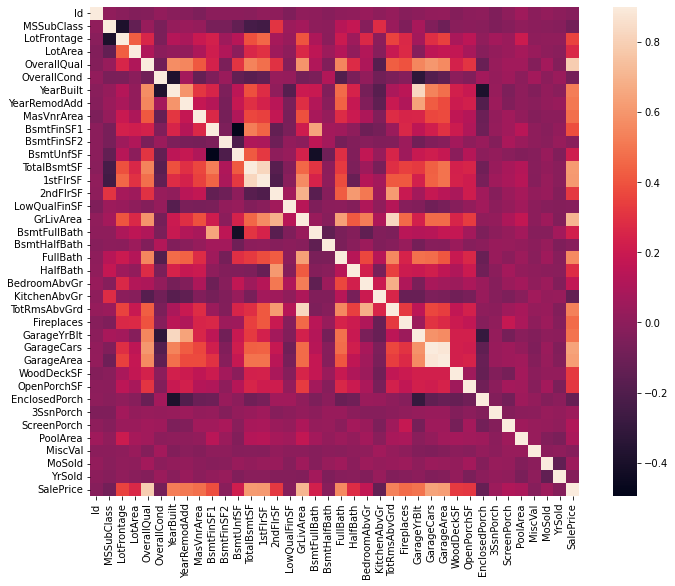

In [8]:
#Correlation map
corrmat = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

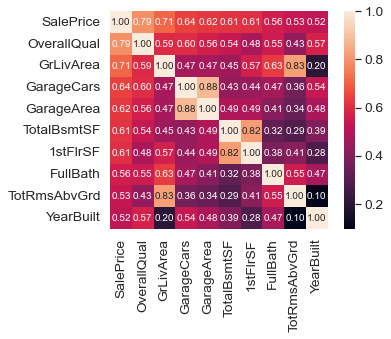

In [9]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

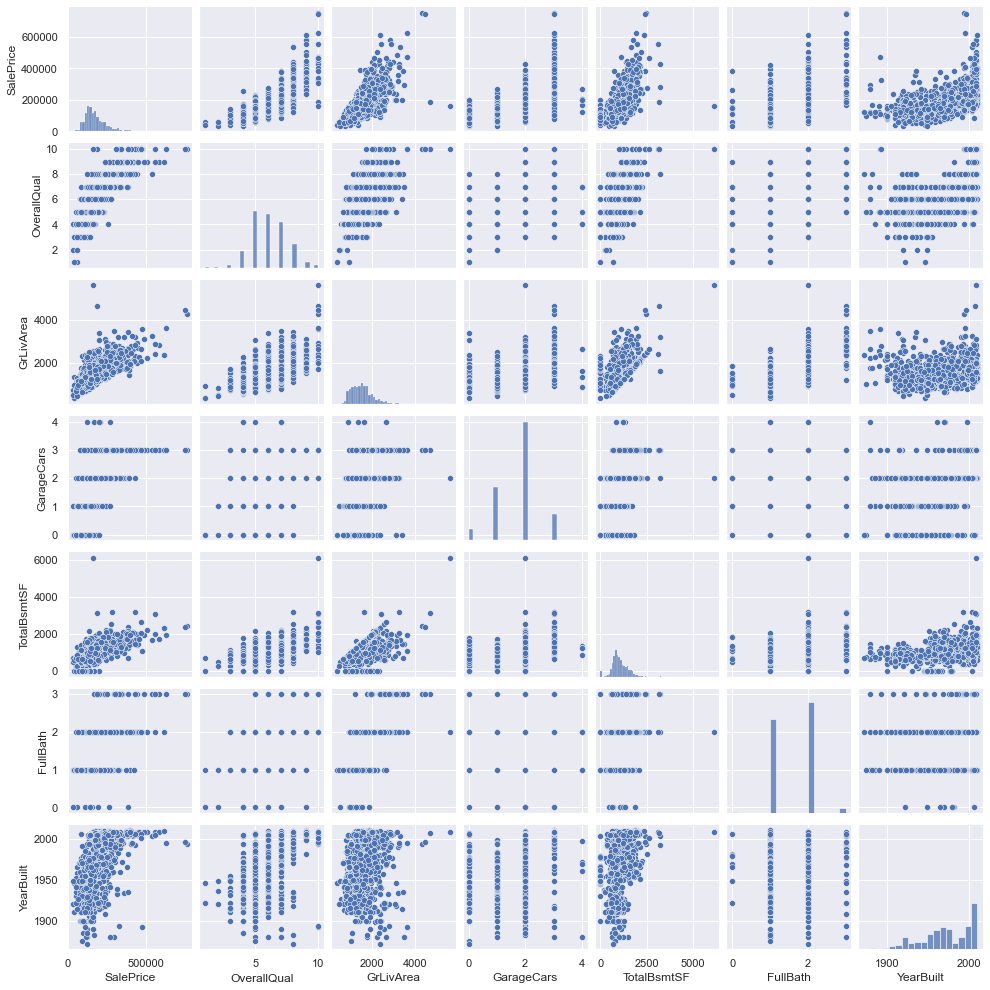

In [10]:
#plotting graph with imp feature
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data[cols],height = 2)
plt.show()

In [11]:
#treating null values 
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479
GarageCond,81,0.055479
BsmtExposure,38,0.026027
BsmtFinType2,38,0.026027


In [12]:
#dropping fence because 81% null

data.drop(['Fence'],axis=1,inplace = True)

In [13]:
data['FireplaceQu'].value_counts()/len(data['FireplaceQu'])*100


Gd    26.027397
TA    21.438356
Fa     2.260274
Ex     1.643836
Po     1.369863
Name: FireplaceQu, dtype: float64

In [14]:
data['LotFrontage'].value_counts()/len(data['LotFrontage'])*100

60.0     9.794521
70.0     4.794521
80.0     4.726027
50.0     3.904110
75.0     3.630137
           ...   
137.0    0.068493
141.0    0.068493
38.0     0.068493
140.0    0.068493
46.0     0.068493
Name: LotFrontage, Length: 110, dtype: float64

In [15]:
data['GarageType'].value_counts()/len(data['GarageType'])*100

Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
Basment     1.301370
CarPort     0.616438
2Types      0.410959
Name: GarageType, dtype: float64

In [16]:

data['GarageYrBlt'].value_counts()/len(data['GarageYrBlt'])*100

2005.0    4.452055
2006.0    4.041096
2004.0    3.630137
2003.0    3.424658
2007.0    3.356164
            ...   
1927.0    0.068493
1900.0    0.068493
1906.0    0.068493
1908.0    0.068493
1933.0    0.068493
Name: GarageYrBlt, Length: 97, dtype: float64

In [17]:
data['GarageFinish'].value_counts()/len(data['GarageFinish'])*100

Unf    41.438356
RFn    28.904110
Fin    24.109589
Name: GarageFinish, dtype: float64

In [18]:
data['GarageQual'].value_counts()/len(data['GarageQual'])*100

TA    89.794521
Fa     3.287671
Gd     0.958904
Ex     0.205479
Po     0.205479
Name: GarageQual, dtype: float64

In [19]:
data['BsmtExposure'].value_counts()/len(data['BsmtExposure'])*100

No    65.273973
Av    15.136986
Gd     9.178082
Mn     7.808219
Name: BsmtExposure, dtype: float64

In [20]:
data['BsmtFinType2'].value_counts()/len(data['BsmtFinType2'])*100

Unf    86.027397
Rec     3.698630
LwQ     3.150685
BLQ     2.260274
ALQ     1.301370
GLQ     0.958904
Name: BsmtFinType2, dtype: float64

In [21]:
data['BsmtFinType1'].value_counts()/len(data['BsmtFinType1'])*100

Unf    29.452055
GLQ    28.630137
ALQ    15.068493
BLQ    10.136986
Rec     9.109589
LwQ     5.068493
Name: BsmtFinType1, dtype: float64

In [22]:
data['BsmtCond'].value_counts()/len(data['BsmtCond'])*100

TA    89.794521
Gd     4.452055
Fa     3.082192
Po     0.136986
Name: BsmtCond, dtype: float64

In [23]:
data['BsmtQual'].value_counts()/len(data['BsmtQual'])*100

TA    44.452055
Gd    42.328767
Ex     8.287671
Fa     2.397260
Name: BsmtQual, dtype: float64

In [24]:
data['MasVnrArea'].value_counts()/len(data['MasVnrArea'])*100

0.0      58.972603
180.0     0.547945
72.0      0.547945
108.0     0.547945
120.0     0.479452
           ...    
562.0     0.068493
89.0      0.068493
921.0     0.068493
762.0     0.068493
119.0     0.068493
Name: MasVnrArea, Length: 327, dtype: float64

In [25]:
data['MasVnrType'].value_counts()/len(data['MasVnrType'])*100

None       59.178082
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64

In [26]:
data.drop(['BsmtCond','BsmtFinType2','BsmtExposure','GarageQual','GarageYrBlt','GarageCond','MasVnrArea'],axis=1,inplace = True)

In [27]:
qualitative = [f for f in data.columns if data.dtypes[f] == 'object']

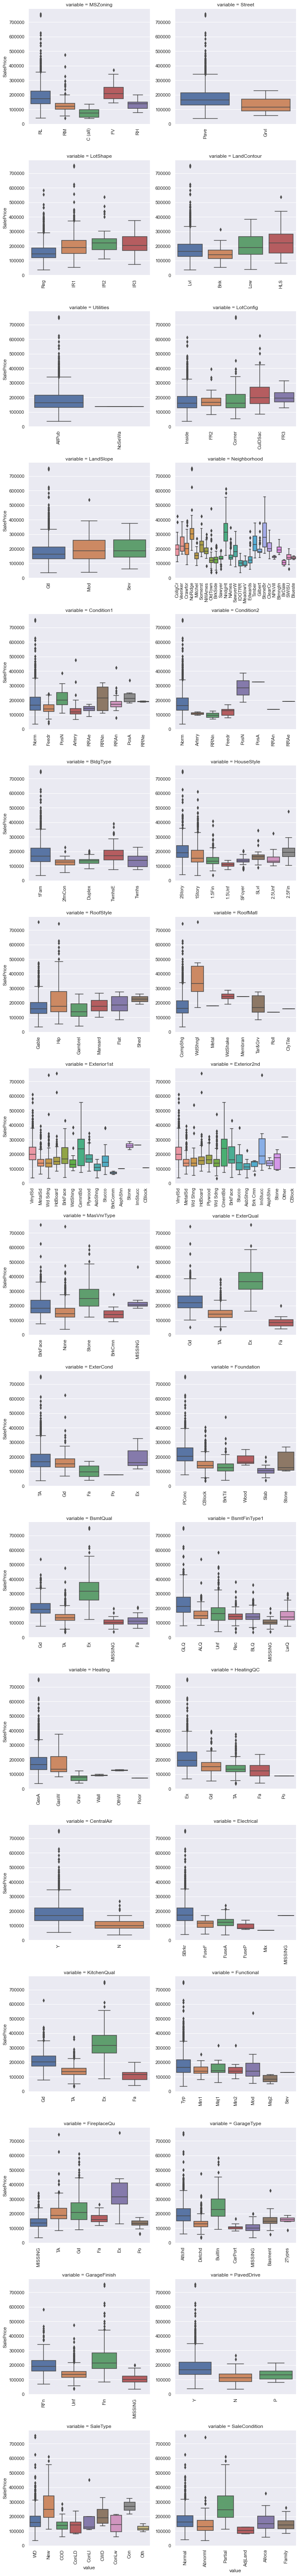

In [28]:

for c in qualitative:
    data[c] = data[c].astype('category')
    if data[c].isnull().any():
        data[c] = data[c].cat.add_categories(['MISSING'])
        data[c] = data[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(data, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice")

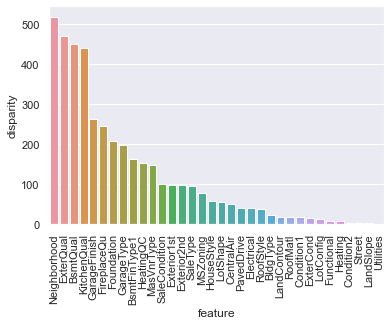

In [29]:
#relation with sales 
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(data)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

Features with most infulence 
- Neighbourhood
- ExterQuality
- Basement Quality
- KitchenQuality

In [30]:
print("Shape")
print(data.shape)
print("Info")
print(data.info())

Shape
(1460, 70)
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   int64   
 17  OverallCond

In [31]:
data['LotFrontage'].fillna('0', inplace = True)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [32]:
housing = data

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [33]:
y = housing['SalePrice']

In [34]:
housing.drop(['SalePrice', 'Id'],axis=1,inplace=True)

In [35]:
housing_categorical = housing.select_dtypes(include=['category'])
housing_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Y,SBrkr,Gd,Typ,MISSING,Attchd,RFn,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Y,SBrkr,TA,Typ,TA,Attchd,RFn,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,Y,WD,Normal


In [36]:
housing_dummies = pd.get_dummies(housing_categorical)
housing_dummies.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [37]:
 #Dropping all categorical variables

housing = housing.drop(list(housing_categorical.columns),axis=1)

In [38]:
# concat dummy variables with housing dataset
housing = pd.concat([housing, housing_dummies], axis=1)
housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [39]:
# Scaling the features

from sklearn.preprocessing import scale

cols = housing.columns
housing = pd.DataFrame(scale(housing))
housing.columns = cols
housing.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=256)

In [40]:
# Split into test and train data set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


In [42]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.003,0,20]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.003, 0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [43]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.038482,2.836608e-02,0.012137,0.005675,0.0001,{'alpha': 0.0001},-17463.606433,-20702.206037,-21232.974576,-17966.520966,...,-19229.206191,1489.810055,6,-12234.926716,-11859.737099,-12418.136070,-12504.077096,-12089.115149,-12221.198426,231.124869
1,0.022388,7.840045e-03,0.003128,0.006257,0.0005,{'alpha': 0.0005},-17463.597272,-20702.190915,-21232.939697,-17966.477416,...,-19229.175134,1489.810401,5,-12234.919815,-11859.732083,-12418.127609,-12504.075465,-12089.112151,-12221.193425,231.124858
2,0.009385,7.662511e-03,0.009373,0.007653,0.001,{'alpha': 0.001},-17463.585822,-20702.172024,-21232.896095,-17966.422995,...,-19229.136317,1489.810833,4,-12234.911190,-11859.725813,-12418.117033,-12504.073426,-12089.108403,-12221.187173,231.124844
3,0.028364,2.545880e-02,0.006250,0.007655,0.005,{'alpha': 0.005},-17463.494222,-20702.020919,-21232.547304,-17965.987701,...,-19228.825822,1489.814290,2,-12234.842191,-11859.675654,-12418.032431,-12504.057112,-12089.078416,-12221.137161,231.124731
4,0.015621,4.422006e-07,0.006248,0.007652,0.003,{'alpha': 0.003},-17463.540022,-20702.096467,-21232.721694,-17966.205334,...,-19228.981061,1489.812560,3,-12234.876689,-11859.700733,-12418.074730,-12504.065270,-12089.093410,-12221.162166,231.124787


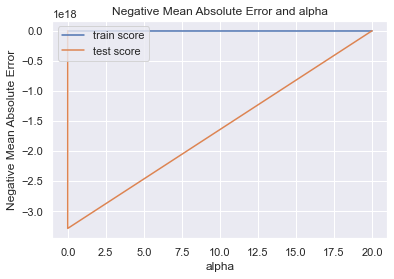

In [44]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [45]:
alpha = 20
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [46]:
from sklearn.metrics import r2_score

In [47]:
y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9433681837543344

In [48]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9485868892165539

In [49]:
#different values of alpha 10, 5, 1, 0.01, 0.03, 0.05

print("Pred")
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
print("\n")

print("Test")
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)



Pred
0.9439144444535228


Test


0.9497168252475245

In [50]:
print("Pred")
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
print("\n")

print("Test")
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

Pred
0.9441007998676983


Test


0.9502017024948746

In [51]:
print("Pred")
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
print("\n")

print("Test")
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

Pred
0.944175138300248


Test


0.9504671238631482

In [52]:
print("Pred")
alpha = 0.01
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
print("\n")

print("Test")
alpha = 0.01
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

Pred
0.9441787976538243


Test


0.950488575044496

In [53]:
print("Pred")
alpha = 0.03
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
print("\n")

print("Test")
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

Pred
0.9441787945946867


Test


0.9497168252475245

In [54]:
print("Pred")
alpha = 0.05
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
print("\n")

print("Test")
alpha = 0.05
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

Pred
0.9441787884846163


Test


0.9504885042511111

In [55]:
#Laso
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.822e+10, tolerance: 5.301e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.896e+10, tolerance: 4.851e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.831e+10, tolerance: 5.169e

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.880e+10, tolerance: 4.884e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increa

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.003, 0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [56]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.348035,0.037635,0.003131,0.006261,0.0001,{'alpha': 0.0001},-17464.925160,-20821.965666,-21263.661107,-17730.091887,...,-19217.229840,1562.992388,6,-12234.928269,-11859.738207,-12418.137997,-12504.077613,-12089.115852,-12221.199588,231.124916
1,0.325063,0.015691,0.012746,0.006389,0.0005,{'alpha': 0.0005},-17464.924341,-20821.941090,-21263.692101,-17730.049609,...,-19217.189989,1563.012252,5,-12234.927581,-11859.737622,-12418.137245,-12504.078051,-12089.115654,-12221.199231,231.125093
2,0.319312,0.017477,0.003412,0.006824,0.001,{'alpha': 0.001},-17464.923318,-20821.910370,-21263.730844,-17729.996762,...,-19217.140176,1563.037087,4,-12234.926721,-11859.736890,-12418.136304,-12504.078599,-12089.115407,-12221.198784,231.125313
3,0.323482,0.007534,0.006261,0.007668,0.005,{'alpha': 0.005},-17464.915133,-20821.663767,-21264.040787,-17729.574035,...,-19216.741310,1563.235778,2,-12234.919839,-11859.731003,-12418.128778,-12504.082335,-12089.113315,-12221.195054,231.126944
4,0.307420,0.015737,0.003334,0.006181,0.003,{'alpha': 0.003},-17464.919225,-20821.787490,-21263.885816,-17729.785375,...,-19216.940802,1563.136497,3,-12234.923280,-11859.733964,-12418.132541,-12504.080789,-12089.114350,-12221.196985,231.126203


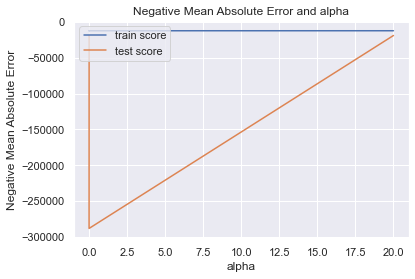

In [57]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [58]:
alpha =20
lasso = Lasso(alpha=alpha)
     
lasso.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.443e+08, tolerance: 6.381e+08
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=20)

In [59]:
y_train_pred=lasso.predict(X_train)
r2_score(y_train,y_train_pred)

0.9441111326495117

In [60]:
alpha =20

lasso = Lasso(alpha=alpha)

lasso.fit(X_test, y_test)

y_test_pred=lasso.predict(X_test)
r2_score(y_test,y_test_pred)

0.9503904235294796

In [61]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas

C:\Users\HP\AppData\Local\Temp\ipykernel_10188\1683627847.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = housing.columns


""
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
...
SaleCondition_AdjLand
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal


In [69]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge,Lasso
MSSubClass,-3.455323e+03,-2749.359886
LotFrontage,3.176770e+02,279.611927
LotArea,1.141646e+04,11056.636759
OverallQual,1.282786e+04,13155.495210
OverallCond,7.600454e+03,7542.678278
YearBuilt,4.500527e+03,4466.297779
YearRemodAdd,-4.076715e+03,-3464.090774
BsmtFinSF1,6.431313e+03,10091.275880
BsmtFinSF2,1.542072e+03,2828.653922
BsmtUnfSF,-3.530545e+03,-0.000000


In [70]:
betas[betas['Lasso']==0] #features removed by lasso

,Ridge,Lasso
BsmtUnfSF,-3.530545e+03,-0.0
2ndFlrSF,2.707635e+03,0.0
LowQualFinSF,3.360984e+02,0.0
MSZoning_RL,-1.161343e+03,-0.0
Street_Pave,1.456565e+03,0.0
LotShape_Reg,-2.453289e+01,0.0
LandContour_Lvl,-1.239264e+03,-0.0
Utilities_AllPub,5.770897e-27,0.0
Utilities_NoSeWa,0.000000e+00,0.0
LotConfig_FR2,-8.543795e+01,0.0


In [71]:
## View the features selected by lasso
betas.loc[betas['Lasso']!=0, 'Lasso']

MSSubClass              -2.749360e+03
LotFrontage              2.796119e+02
LotArea                  1.105664e+04
OverallQual              1.315550e+04
OverallCond              7.542678e+03
YearBuilt                4.466298e+03
YearRemodAdd            -3.464091e+03
BsmtFinSF1               1.009128e+04
BsmtFinSF2               2.828654e+03
TotalBsmtSF              1.093883e+02
1stFlrSF                 9.476561e+03
GrLivArea                1.560846e+04
BsmtFullBath            -2.459349e+03
BsmtHalfBath            -1.832015e+02
FullBath                 4.020556e+03
HalfBath                 3.498929e+03
BedroomAbvGr            -6.374869e+03
KitchenAbvGr             4.721697e+01
TotRmsAbvGrd             6.365531e+03
Fireplaces               7.285257e+03
GarageCars               5.148144e+03
GarageArea               1.859682e+02
WoodDeckSF               1.840964e+03
OpenPorchSF              2.176316e+03
EnclosedPorch            1.447508e+03
3SsnPorch                2.966112e+01
ScreenPorch 

In [72]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]


OverallQual             12827.863258
Neighborhood_NridgHt    12407.367836
1stFlrSF                12296.730769
LotArea                 11416.460381
GrLivArea               11326.906624
Neighborhood_StoneBr     8347.827592
Fireplaces               7654.350760
OverallCond              7600.453874
GarageType_BuiltIn       6788.065677
BsmtFinSF1               6431.313148
Name: Ridge, dtype: float64

In [73]:
## To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


SaleCondition_Partial    inf
HouseStyle_SLvl          inf
FireplaceQu_Po           inf
FireplaceQu_MISSING      inf
BldgType_Duplex          inf
BldgType_2fmCon          inf
BldgType_1Fam            inf
HeatingQC_Gd             inf
Condition2_Norm          inf
Condition1_Norm          inf
Name: Ridge, dtype: float64

In [74]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea               15608.459898
OverallQual             13155.495210
Neighborhood_NridgHt    12148.442125
LotArea                 11056.636759
BsmtFinSF1              10091.275880
1stFlrSF                 9476.560759
Neighborhood_StoneBr     8159.581273
OverallCond              7542.678278
GarageType_BuiltIn       7369.008572
Fireplaces               7285.257168
Name: Lasso, dtype: float64

In [75]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

SaleCondition_Partial    inf
YrSold                   inf
Exterior1st_WdShing      inf
HeatingQC_Fa             inf
MSZoning_RM              inf
SaleType_COD             inf
Exterior1st_MetalSd      inf
HeatingQC_Gd             inf
LotShape_IR2             inf
Exterior1st_BrkFace      inf
Name: Lasso, dtype: float64

# overall feature/parameters affecting the cost

GrLivArea               
OverallQual             
Neighborhood_NridgHt    
LotArea                 
BsmtFinSF1              

In [77]:
#Doubling the alpha value
alpha = 0.1
ridge = Ridge(alpha=alpha)

print("Pred")
ridge.fit(X_train, y_train)
y_train_pred=ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
print("\n")

print("Test")
ridge.fit(X_test, y_test)
y_test_pred=ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

Pred
0.9441787599174702


Test
0.9504882891163333


In [78]:
alpha = 40
lasso = Lasso(alpha=alpha)

print("Pred")
lasso.fit(X_train, y_train)
y_train_pred=lasso.predict(X_train)
print(r2_score(y_train,y_train_pred))
print("\n")

print("Test")
lasso.fit(X_test, y_test)
y_test_pred=lasso.predict(X_test)
print(r2_score(y_test,y_test_pred))

Pred
0.943957978408124


Test
0.9501922260093911


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.197e+09, tolerance: 6.381e+08
  model = cd_fast.enet_coordinate_descent(


In [82]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas

C:\Users\HP\AppData\Local\Temp\ipykernel_10188\1092238728.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = X_train.columns


""
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF


In [83]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [88]:
betas

,Ridge,Lasso
MSSubClass,-3.959121e+03,-2.749360e+03
LotFrontage,3.114449e+02,2.796119e+02
LotArea,1.208337e+04,1.105664e+04
OverallQual,1.325787e+04,1.315550e+04
OverallCond,7.802276e+03,7.542678e+03
YearBuilt,5.085074e+03,4.466298e+03
YearRemodAdd,-4.639892e+03,-3.464091e+03
BsmtFinSF1,6.060078e+03,1.009128e+04
BsmtFinSF2,1.469775e+03,2.828654e+03
BsmtUnfSF,-3.912745e+03,-0.000000e+00


In [85]:
# View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

1stFlrSF                13258.329192
OverallQual             13257.867965
Neighborhood_NridgHt    12808.995278
LotArea                 12083.366305
GrLivArea               11746.770974
Neighborhood_StoneBr     8481.696364
Fireplaces               7950.793629
OverallCond              7802.276330
GarageType_BuiltIn       7102.684938
TotRmsAbvGrd             6243.564155
Name: Ridge, dtype: float64

In [86]:
# View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea               15608.459898
OverallQual             13155.495210
Neighborhood_NridgHt    12148.442125
LotArea                 11056.636759
BsmtFinSF1              10091.275880
1stFlrSF                 9476.560759
Neighborhood_StoneBr     8159.581273
OverallCond              7542.678278
GarageType_BuiltIn       7369.008572
Fireplaces               7285.257168
Name: Lasso, dtype: float64

In [89]:
# Create a list of top 5 lasso predictors that are to be removed
top5 = ['GrLivArea', 'OverallQual', 'Neighborhood_NridgHt', 'LotArea', 'BsmtFinSF1']

In [90]:
# drop them from train and test data
X_train_dropped = X_train.drop(top5, axis=1)
X_test_dropped = X_test.drop(top5, axis=1)

In [91]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

In [92]:
lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_dropped, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [93]:
GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [94]:
# View the optimal value of alpha
lassoCV.best_params_

{'alpha': 1000}

In [95]:
# Create a lasso instance with optimum value alpha=0.001
lasso = Lasso(alpha=1000)

In [96]:
lasso.fit(X_train_dropped, y_train)

Lasso(alpha=1000)

In [98]:
y_train_pred=lasso.predict(X_train_dropped)
print(r2_score(y_train,y_train_pred))

0.9209197062269664


In [99]:
betas = pd.DataFrame(index=X_train_dropped.columns)
betas.rows = X_train_dropped.columns
betas

C:\Users\HP\AppData\Local\Temp\ipykernel_10188\2022133640.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = X_train_dropped.columns


""
MSSubClass
LotFrontage
OverallCond
YearBuilt
YearRemodAdd
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF


In [101]:
betas['Lasso'] = lasso.coef_
betas

,Lasso
MSSubClass,-0.000000
LotFrontage,1182.252501
OverallCond,4825.772334
YearBuilt,8620.805521
YearRemodAdd,2867.151509
BsmtFinSF2,-0.000000
BsmtUnfSF,-3493.607735
TotalBsmtSF,15299.725095
1stFlrSF,23263.917439
2ndFlrSF,26259.606454


In [102]:
# View the top 5 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:5]

2ndFlrSF       26259.606454
1stFlrSF       23263.917439
TotalBsmtSF    15299.725095
BsmtQual_Ex     9701.009276
YearBuilt       8620.805521
Name: Lasso, dtype: float64